In [1]:
# Chicago Crime Analysis
# W200 Fall 18 | Group Project 2
# Team members: Jonathan Hilton, Thanh Le, Eddie Zhu

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read Chicago crime data csv file
crime_pd = pd.read_csv("crimes2001topresent.csv")

In [3]:
crime_pd.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39.0,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,40.0,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,28.0,25.0,03,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"


In [4]:
len(crime_pd)

6749651

In [10]:
columns = ["Date","Primary Type","Description","Year","Block","Latitude","Longitude","Location"]
crime_df = pd.DataFrame(crime_pd, columns = columns)
crime_df.head()

,Date,Primary Type,Description,Year,Block,Latitude,Longitude,Location
0,03/18/2015 07:44:00 PM,BATTERY,AGGRAVATED: HANDGUN,2015,047XX W OHIO ST,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,03/18/2015 11:00:00 PM,OTHER OFFENSE,PAROLE VIOLATION,2015,066XX S MARSHFIELD AVE,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,03/18/2015 10:45:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,2015,044XX S LAKE PARK AVE,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,03/18/2015 10:30:00 PM,BATTERY,SIMPLE,2015,051XX S MICHIGAN AVE,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,03/18/2015 09:00:00 PM,ROBBERY,ARMED: HANDGUN,2015,047XX W ADAMS ST,41.878065,-87.743354,"(41.878064761, -87.743354013)"


In [11]:
len(crime_df)

6749651

In [7]:
# read parking traffic violation csv data file
parking_pd = pd.read_csv("parking_tickets.csv")

/Users/t/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6,9,19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
parking_pd.head()

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,...,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address
0,51551278,2007-01-01 00:00:00,6014 W 64TH ST,90ad622c3274c9bdc9d8c812b79a01d0aaf7479f2bd743...,IL,PAS,60638,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,8,...,100,0.0,100.0,Paid,2007-05-21 00:00:00,SEIZ,NaN,5048648030,15227,"6000 w 64th st, chicago, il"
1,51491256,2007-01-01 00:00:00,530 N MICHIGAN,bce4dc26b2c96965380cb2b838cdbb95632b7b57160612...,IL,PAS,606343801,0964150B,PARKING/STANDING PROHIBITED ANYTIME,18,...,100,50.0,0.0,Define,2007-01-22 00:00:00,NaN,NaN,0,18320,"500 n michigan, chicago, il"
2,50433524,2007-01-01 00:01:00,4001 N LONG,44641e828f4d894c883c07c566063c2d99d08f2c03b3d4...,IL,PAS,60148,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,16,...,100,0.0,50.0,Paid,2007-01-31 00:00:00,VIOL,NaN,5079875240,3207,"4000 n long, chicago, il"
3,51430906,2007-01-01 00:01:00,303 E WACKER,eee50ca0d9be2debd0e7d45bad05b8674a6cf5b892230f...,IL,PAS,60601,0964110A,DOUBLE PARKING OR STANDING,152,...,200,0.0,100.0,Paid,2007-03-08 00:00:00,DETR,Liable,5023379950,19410,"300 e wacker, chicago, il"
4,51507779,2007-01-01 00:01:00,7 E 41ST ST,244116ca3eed4235b1f61f6d753d8c688be2a48c9fdd97...,IL,PAS,605053013,0976220B,SMOKED/TINTED WINDOWS PARKED/STANDING,2,...,50,0.0,50.0,Paid,2007-08-29 00:00:00,SEIZ,NaN,5079891400,66396,"7 e 41st st, chicago, il"


In [9]:
len(parking_pd)

28272580

In [13]:
columns = ["issue_date","violation_location","address"]
parking_df = pd.DataFrame(parking_pd, columns = columns)
parking_df.head()

,issue_date,violation_location,address
0,2007-01-01 00:00:00,6014 W 64TH ST,"6000 w 64th st, chicago, il"
1,2007-01-01 00:00:00,530 N MICHIGAN,"500 n michigan, chicago, il"
2,2007-01-01 00:01:00,4001 N LONG,"4000 n long, chicago, il"
3,2007-01-01 00:01:00,303 E WACKER,"300 e wacker, chicago, il"
4,2007-01-01 00:01:00,7 E 41ST ST,"7 e 41st st, chicago, il"


In [14]:
len(parking_df)

28272580

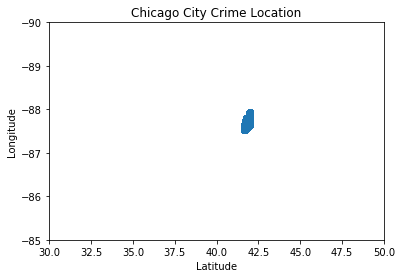

In [20]:
# Scatter plot for Longitude vs Latitude in Crime data

plt.scatter(crime_df["Latitude"],crime_df["Longitude"])
plt.title("Chicago City Crime Location")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.xlim([30,50])
plt.ylim([-85,-90])
plt.savefig("crime.png")

plt.show()

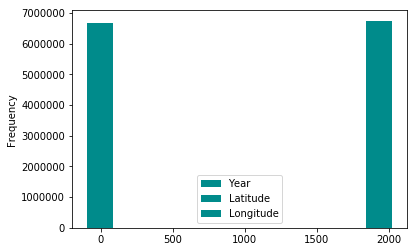

In [17]:
crime_df.plot.hist(bins=12,color='darkcyan')
plt.show()